In [67]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [115]:
# data imports
path = 'C:/Users/Kavish/Dropbox/_Master of Data Science - UM/WQD7005 - Data Mining/Assignment/Milestone 5/'
df = pd.read_csv(path + 'data_combined_sources.csv')
df.head()

df['Datetime'] = pd.to_datetime(df.Datetime)
# df = df.set_index('Datetime')
# df = df.sort_values(by='Datetime')


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160307 entries, 0 to 160306
Data columns (total 10 columns):
Datetime         160307 non-null datetime64[ns]
CompanySymbol    160307 non-null object
OpenPrice        160307 non-null float64
HighPrice        160307 non-null float64
LowPrice         160307 non-null float64
LastPrice        160307 non-null float64
Difference       160307 non-null float64
ChangeLabel      160307 non-null object
TweetLabel       160307 non-null object
NewsLabel        160307 non-null object
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 12.2+ MB


In [206]:
df.head()

,Datetime,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice,Difference,ChangeLabel,TweetLabel,NewsLabel
0,2019-03-13 19:13:00,3A,0.850,0.855,0.845,0.850,0.000,0,0,0
1,2019-03-13 19:13:00,A50CHIN-C22,0.140,0.145,0.120,0.135,-0.005,1,1,1
2,2019-03-13 19:13:00,A50CHIN-C24,0.670,0.670,0.670,0.670,0.000,0,1,0
3,2019-03-13 19:13:00,A50CHIN-C26,0.000,0.000,0.000,0.430,0.430,2,2,2
4,2019-03-13 19:13:00,A50CHIN-C28,0.225,0.225,0.210,0.220,-0.005,1,1,1


In [117]:
df.isnull().sum()

Datetime         0
CompanySymbol    0
OpenPrice        0
HighPrice        0
LowPrice         0
LastPrice        0
Difference       0
ChangeLabel      0
TweetLabel       0
NewsLabel        0
dtype: int64

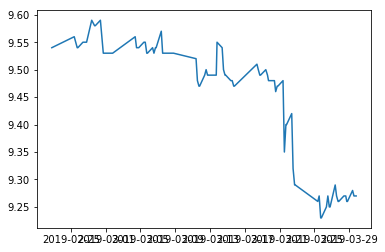

In [127]:
def plot_ts(code):
    temp = df[df['CompanySymbol'] == code]
    temp = temp.set_index('Datetime')
    temp = temp.sort_values(by='Datetime')
    plt.plot(temp['LastPrice'])
    
def filter_company(code):
    temp = df[df['CompanySymbol'] == code]
    temp = temp.set_index('Datetime')
    temp = temp.sort_values(by='Datetime')
    return temp
    
plot_ts('MAYBANK')

In [122]:
# tweet = pd.get_dummies(df['TweetLabel'],drop_first=True)
# news = pd.get_dummies(df['NewsLabel'],drop_first=True)

df['ChangeLabel'] = df['ChangeLabel'].map( {'Unchanged': 0, 'Decrease': 1, 'Increase': 2} ).astype(int)
df['NewsLabel'] = df['NewsLabel'].map( {'Neutral': 0, 'Negative': 1, 'Positive': 2} ).astype(int)
df['TweetLabel'] = df['TweetLabel'].map( {'Neutral': 0, 'Negative': 1, 'Positive': 2} ).astype(int)

new_df = df.drop(['Datetime','CompanySymbol','OpenPrice','HighPrice','LowPrice','LastPrice','Difference'],axis=1)
new_df.head()

,ChangeLabel,TweetLabel,NewsLabel
0,0,0,0
1,1,1,1
2,0,1,0
3,2,2,2
4,1,1,1


In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop('ChangeLabel',axis=1),new_df['ChangeLabel'], test_size=0.30,random_state=101)

In [128]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [129]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66     12126
           1       0.00      0.00      0.00      7158
           2       0.74      0.92      0.82     28809

   micro avg       0.72      0.72      0.72     48093
   macro avg       0.46      0.53      0.49     48093
weighted avg       0.61      0.72      0.66     48093

Accuracy: 0.7161541180629197


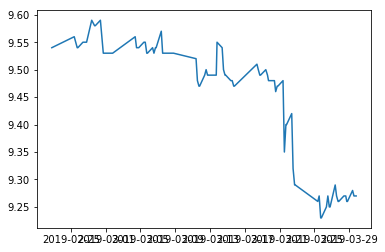

In [130]:
plot_ts('MAYBANK')

In [131]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

data = filter_company('MAYBANK')
data.head()

,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice,Difference,ChangeLabel,TweetLabel,NewsLabel
Datetime,,,,,,,,,
2019-02-22 19:11:00,MAYBANK,9.53,9.57,9.52,9.54,0.01,2,2,1
2019-02-25 09:06:00,MAYBANK,9.56,9.56,9.54,9.56,0.00,0,2,0
2019-02-25 17:19:00,MAYBANK,9.56,9.57,9.51,9.54,-0.02,1,1,1
2019-02-25 19:11:00,MAYBANK,9.56,9.57,9.51,9.54,-0.02,1,1,1
2019-02-26 09:07:00,MAYBANK,9.56,9.57,9.55,9.55,-0.01,1,1,0


In [132]:
maybank_last_price = data.LastPrice.values
maybank_last_price

model = ARIMA(maybank_last_price, order=(1, 1, 1))
model_fit = model.fit(disp=0)
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   92
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 211.196
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sun, 02 Jun 2019   AIC                           -414.393
Time:                        16:52:15   BIC                           -404.306
Sample:                             1   HQIC                          -410.322
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.002     -1.704      0.092      -0.006       0.000
ar.L1.D.y      0.1971      0.269      0.733      0.465      -0.330       0.724
ma.L1.D.y     -0.4444      0.236     -1.881      0.063      -0.907       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.0748           +0.0000j            5.0748            0.0000
MA.1            2.2500           +0.0000j            2.2500            0.0000
-----------------------------------------------------------------------------
"""

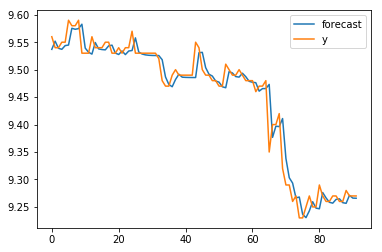

In [133]:
model_fit.plot_predict(dynamic=False)
plt.show()

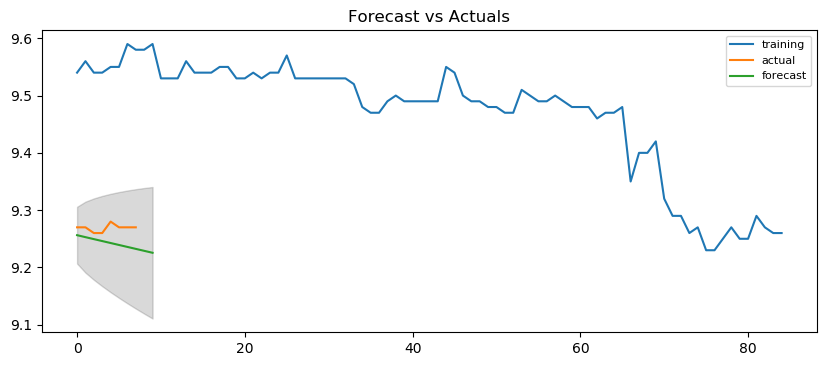

In [203]:
from statsmodels.tsa.stattools import acf


new_data = data[['LastPrice']]

# Create Training and Test
train = new_data.values[:85]
test = new_data.values[-8:]


# # Create Training and Test
# train = maybank_last_price[:83]
# test = maybank_last_price[-10:]

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])


# for i in range(85):
#     test = np.insert(test,0,'NaN', axis=0)

# Plot
plt.figure(figsize=(10,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=8)
plt.show()